In [1]:
!pip3 install transformers datasets

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 480.6/480.6 kB 14.6 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 116.3/116.3 kB 10.7 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 179.3/179.3 kB 10.9 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 134.8/134.8 kB 6.9 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 194.1/194.1 kB 15.0 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver

In [2]:
from transformers import BertForSequenceClassification,AutoTokenizer,Trainer,TrainingArguments
from datasets import load_dataset
import os

In [3]:
 os.environ["WANDB_DISABLED"] = "true"

 dataset = load_dataset("imdb")

 model = BertForSequenceClassification.from_pretrained("bert-base-uncased",num_labels=2)
 tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

 def preprocess_function(examples):
  return tokenizer(examples['text'],truncation=True,padding=True)

 encoded_dataset = dataset.map(preprocess_function,batched=True, batch_size=64)

train_set = encoded_dataset["train"].shuffle(seed=42)
test_set = encoded_dataset["test"]
indices = list(range(5000)) + list(range(len(test_set) - 5000, len(test_set)))
test_set = test_set.select(indices)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/7.81k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/21.0M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/20.5M [00:00<?, ?B/s]

unsupervised-00000-of-00001.parquet:   0%|          | 0.00/42.0M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

Map:   0%|          | 0/50000 [00:00<?, ? examples/s]

In [4]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(axis=-1)
    accuracy = accuracy_score(labels, preds)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average="binary")
    return {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1": f1
    }

In [5]:
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy = "epoch",
    save_strategy = "epoch",
    learning_rate = 2e-5,
    per_device_train_batch_size = 16,
    num_train_epochs = 1
)

trainer = Trainer(
    model = model,
    args = training_args,
    train_dataset = train_set,
    eval_dataset = test_set,
    compute_metrics=compute_metrics,
)

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(
Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


In [6]:
trainer.train()

TrainOutput(global_step=1563, training_loss=0.24064816226580932, metrics={'train_runtime': 2778.2214, 'train_samples_per_second': 8.999, 'train_steps_per_second': 0.563, 'total_flos': 6577776384000000.0, 'train_loss': 0.24064816226580932, 'epoch': 1.0})

In [7]:
eval_results = trainer.evaluate(test_set)

print("Evaluating fine-tuned BERT model")
print(f"Accuracy: {eval_results['eval_accuracy']}")
print(f"Precision: {eval_results['eval_precision']}")
print(f"Recall: {eval_results['eval_recall']}")
print(f"F1-score: {eval_results['eval_f1']}")

Evaluating fine-tuned BERT model
Accuracy: 0.9365
Precision: 0.9273546113177991
Recall: 0.9472
F1-score: 0.9371722568516869


In [8]:
from transformers import BertModel

pretrained_model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)

pretrained_eval_training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    num_train_epochs=1,
    do_train=False,
    do_eval=True
)

pretrained_eval_trainer = Trainer(
    model=pretrained_model,
    args=training_args,
    eval_dataset=test_set,
    compute_metrics=compute_metrics,
)

pretrained_eval_results = pretrained_eval_trainer.evaluate(test_set)

print("Evaluating Pre-trained BERT Model")
print(f"Accuracy: {pretrained_eval_results['eval_accuracy']}")
print(f"Precision: {pretrained_eval_results['eval_precision']}")
print(f"Recall: {pretrained_eval_results['eval_recall']}")
print(f"F1-score: {pretrained_eval_results['eval_f1']}")

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(
Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


Evaluating Pre-trained BERT Model
Accuracy: 0.4489
Precision: 0.4641000421525924
Recall: 0.6606
F1-score: 0.54518445159693


In [10]:
trainer.save_model("./fine_tuned_bert_imdb1")

from google.colab import drive
import torch

drive.mount('/content/drive')

model_save_path = '/content/drive/MyDrive/fine_tuned_bert_imdb1.pth'

torch.save(model.state_dict(), model_save_path)
print(f"Model saved to {model_save_path}")

Mounted at /content/drive
Model saved to /content/drive/MyDrive/fine_tuned_bert_imdb.pth


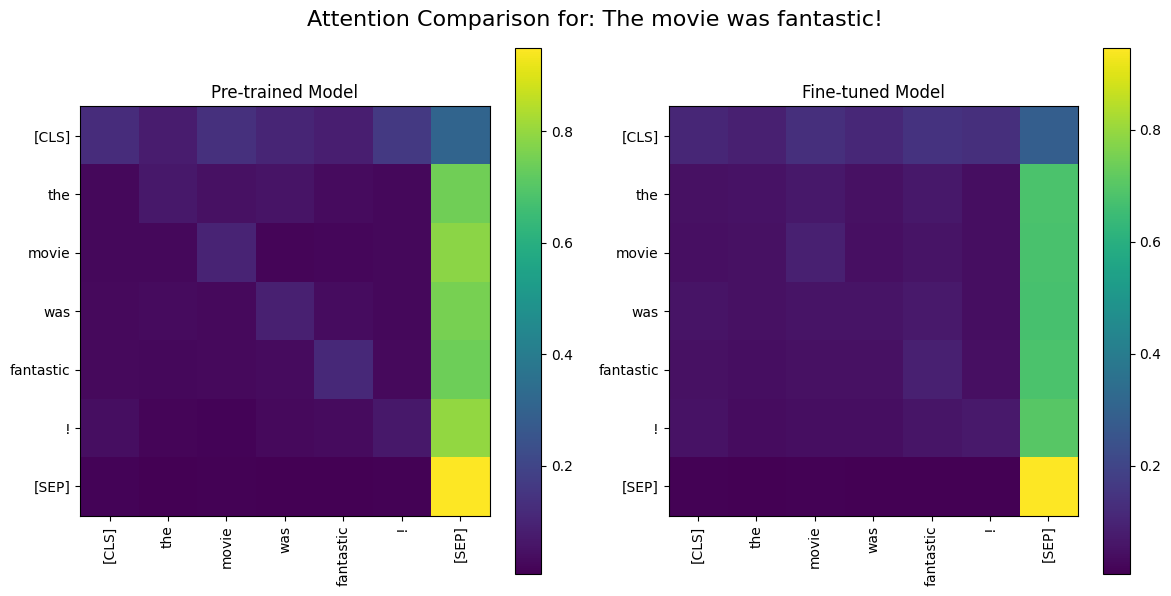

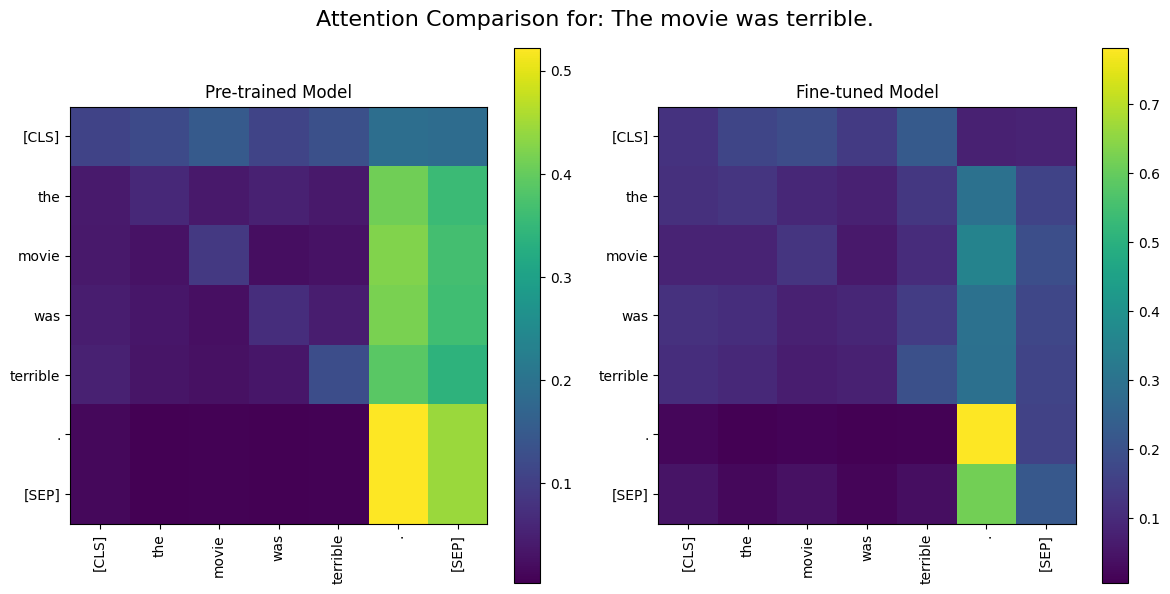

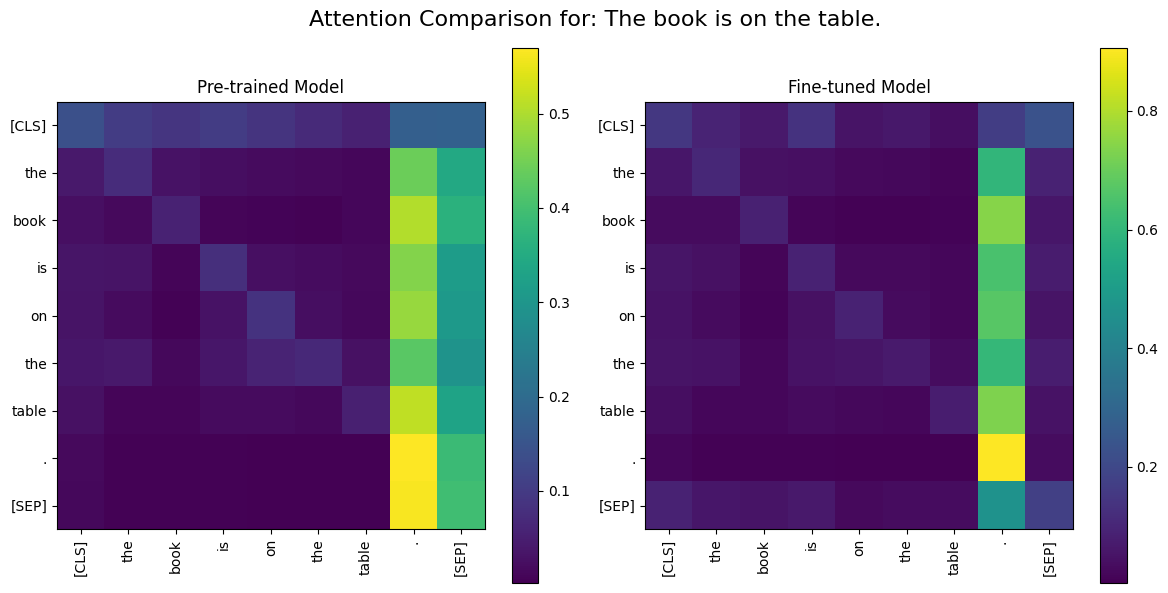

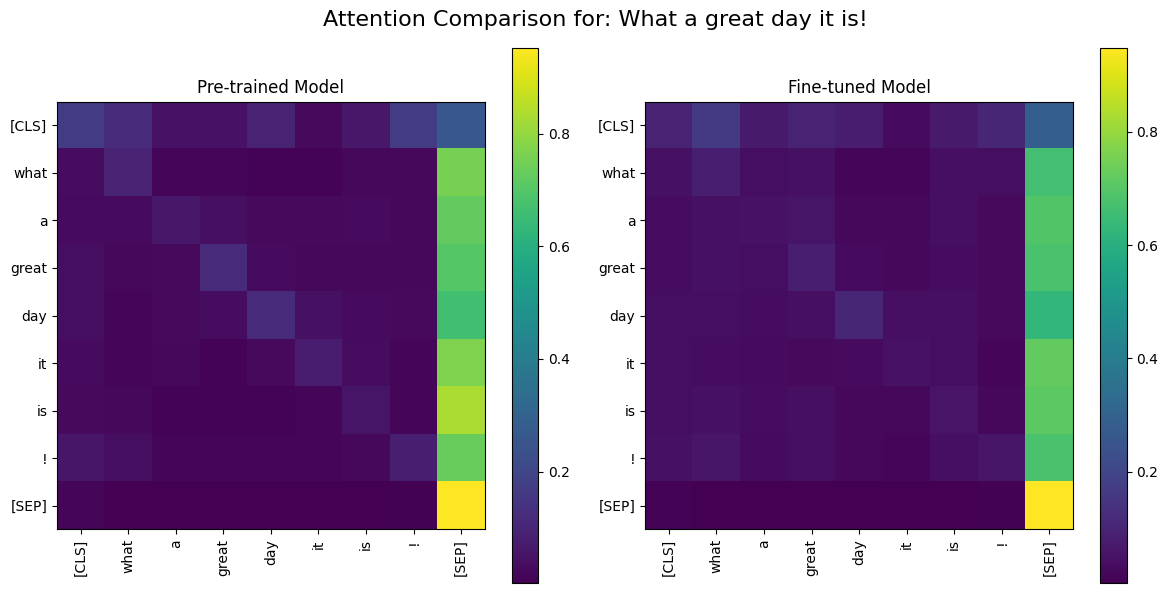

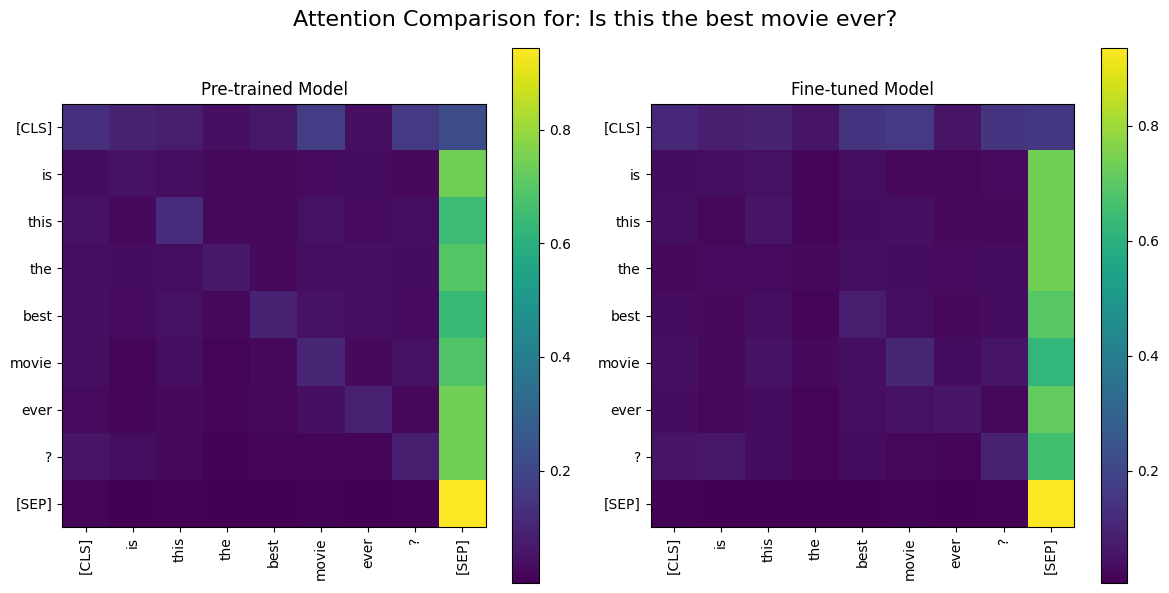

In [14]:
from transformers import BertTokenizer, BertModel
import torch
import matplotlib.pyplot as plt

pretrained_model = BertModel.from_pretrained("bert-base-uncased", output_attentions=True)
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
fine_tuned_model = BertModel.from_pretrained("./fine_tuned_bert_imdb", output_attentions=True)

def plot_attention_comparison_both_models(sentence):
    inputs = tokenizer(sentence, return_tensors="pt")

    # Ëé∑ÂèñÂàÜËØçÂêéÁöÑÂçïËØçÂ∫èÂàó
    tokens = tokenizer.convert_ids_to_tokens(inputs['input_ids'][0])
    seq_len = len(tokens)

    # Ëé∑ÂèñÈ¢ÑËÆ≠ÁªÉÊ®°ÂûãÁöÑÊ≥®ÊÑèÂäõ
    pretrained_outputs = pretrained_model(**inputs)
    pretrained_attentions = pretrained_outputs.attentions[-1][0]

    # Ëé∑ÂèñÂæÆË∞ÉÊ®°ÂûãÁöÑÊ≥®ÊÑèÂäõ
    fine_tuned_outputs = fine_tuned_model(**inputs)
    fine_tuned_attentions = fine_tuned_outputs.attentions[-1][0]

    # ÁªòÂà∂Ê≥®ÊÑèÂäõÊØîËæÉÂõæ
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    fig.suptitle(f"Attention Comparison for: {sentence}", fontsize=16)

    # È¢ÑËÆ≠ÁªÉÊ®°Âûã
    ax1 = axes[0]
    cax1 = ax1.imshow(pretrained_attentions.mean(dim=0).detach().numpy(), cmap="viridis")
    ax1.set_title("Pre-trained Model")
    ax1.set_xticks(range(seq_len))
    ax1.set_yticks(range(seq_len))
    ax1.set_xticklabels(tokens, rotation=90)  # ËÆæÁΩÆ x ËΩ¥Ê†áÁ≠æ‰∏∫ÂàÜËØçÂçïËØç
    ax1.set_yticklabels(tokens)  # ËÆæÁΩÆ y ËΩ¥Ê†áÁ≠æ‰∏∫ÂàÜËØçÂçïËØç
    fig.colorbar(cax1, ax=ax1)

    # ÂæÆË∞ÉÊ®°Âûã
    ax2 = axes[1]
    cax2 = ax2.imshow(fine_tuned_attentions.mean(dim=0).detach().numpy(), cmap="viridis")
    ax2.set_title("Fine-tuned Model")
    ax2.set_xticks(range(seq_len))
    ax2.set_yticks(range(seq_len))
    ax2.set_xticklabels(tokens, rotation=90)  # ËÆæÁΩÆ x ËΩ¥Ê†áÁ≠æ‰∏∫ÂàÜËØçÂçïËØç
    ax2.set_yticklabels(tokens)  # ËÆæÁΩÆ y ËΩ¥Ê†áÁ≠æ‰∏∫ÂàÜËØçÂçïËØç
    fig.colorbar(cax2, ax=ax2)

    plt.tight_layout()
    plt.show()

# Á§∫‰æãÂè•Â≠ê
sentences = [
    "The movie was fantastic!",  # ÊÉÖÊÑüÊ≠£Èù¢
    "The movie was terrible.",   # ÊÉÖÊÑüË¥üÈù¢
    "The book is on the table.", # ‰∏≠Á´ãÂè•Â≠ê
    "What a great day it is!",   # ÊÑüÂèπÂè•
    "Is this the best movie ever?"  # ÈóÆÂè•
]

# ÈÄêÂè•ÁªòÂà∂Ê≥®ÊÑèÂäõÊØîËæÉÂõæ
for sentence in sentences:
    plot_attention_comparison_both_models(sentence)
